<a href="https://colab.research.google.com/github/kids0cn/Jupyter_notebook/blob/master/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E4%BB%8E%E9%9B%B6%E5%BC%80%E5%A7%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#安装pytorch
#pip install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html

In [0]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

%matplotlib inline

In [41]:
#生成数据集

num_inputs = 2
num_examples = 10000
true_w = [2,-3.4]
true_b = 4.2
features = torch.from_numpy(np.random.normal(0,1,(num_examples,num_inputs)))
labels = true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels += torch.from_numpy(np.random.normal(0,0.01,size=labels.size()))

print(features[0],labels[0])

tensor([-1.4360,  0.4010], dtype=torch.float64) tensor(-0.0192, dtype=torch.float64)


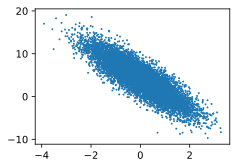

In [42]:
def use_svg_display():
  display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5,2.5)):
  use_svg_display()
  #设置图的尺寸
  plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:,1].numpy(),labels.numpy(),1)


In [0]:
#按照批量读取数据集
def data_iter(batch_size,features,lables):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices) #随机读取样本
  for i in range(0,num_examples,batch_size):
    j=torch.LongTensor(indices[i:min(i+batch_size,num_examples)])
    yield features.index_select(0,j),labels.index_select(0,j)

In [44]:
#打印查看一个小批量样本值
batch_size = 10

for x,y in data_iter(batch_size,features,labels):
  print(x,y)
  break

tensor([[-0.1388, -1.6225],
        [ 0.4726,  1.8537],
        [ 0.2053, -1.1421],
        [-0.5244, -0.4504],
        [-0.2394,  0.3904],
        [-1.1152, -0.3270],
        [-0.9050,  0.2371],
        [-2.6803, -0.8768],
        [-0.1624, -1.3188],
        [-0.1045,  0.7109]], dtype=torch.float64) tensor([ 9.4406, -1.1445,  8.4976,  4.6919,  2.4031,  3.0642,  1.5852,  1.8085,
         8.3537,  1.5768], dtype=torch.float64)


In [45]:
#初始化模型参数
#权重初始化成均值为0，标准差为0.01的正态随机数，偏差值初始化为0

w = torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype=torch.double)
b = torch.zeros(1,dtype=torch.double)

#之后的模型训练中，要对这些参数求梯度来迭代参数的值
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)


tensor([0.], dtype=torch.float64, requires_grad=True)

In [0]:
#定义模型
#下面是线性回归的矢量表达式的实现，使用mm函数做矩阵乘法

def linreg(X,w,b):
  return torch.mm(X,w) + b


In [0]:
#定义损失函数
def squared_loss(y_hat,y):
  #注意这里返回的是向量，另外，pytorch里的MSEloss没有除以2
  return (y_hat-y.view(y_hat.size()))**2/2
  

In [0]:
#定义优化算法
def sgd(params,lr,batch_size):
  for param in params:
    param.data -= lr*param.grad/batch_size
  

In [49]:
#训练模型

lr = 0.01
num_epochs = 20
net = linreg
loss = squared_loss

for epoch in range(num_epochs): #在每一次迭代周期中，会使用训练数据集中的样本一次
  for X,y in data_iter(batch_size,features,labels):
    l = loss(net(X,w,b),y).sum()
    l.backward()
    sgd([w,b],lr,batch_size)

    #不要忘了梯度清零
    w.grad.data.zero_()
    b.grad.data.zero_()
  train_l = loss(net(features,w,b),labels)
  print('epoch %d,loss %f'%(epoch+1,train_l.mean().item()))


epoch 1,loss 0.000050
epoch 2,loss 0.000050
epoch 3,loss 0.000050
epoch 4,loss 0.000050
epoch 5,loss 0.000050
epoch 6,loss 0.000050
epoch 7,loss 0.000050
epoch 8,loss 0.000050
epoch 9,loss 0.000050
epoch 10,loss 0.000050
epoch 11,loss 0.000049
epoch 12,loss 0.000050
epoch 13,loss 0.000050
epoch 14,loss 0.000050
epoch 15,loss 0.000049
epoch 16,loss 0.000050
epoch 17,loss 0.000050
epoch 18,loss 0.000049
epoch 19,loss 0.000050
epoch 20,loss 0.000050


In [50]:
#训练完成后，我们比较学到的参数和用来生成训练集的真实参数，他们应该很接近
print(true_w,'\n',w)
print(true_b,'\n',b)

[2, -3.4] 
 tensor([[ 2.0003],
        [-3.4001]], dtype=torch.float64, requires_grad=True)
4.2 
 tensor([4.1999], dtype=torch.float64, requires_grad=True)
